In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

ModuleNotFoundError: No module named 'gensim'

In [2]:
vgsales = pd.read_csv('vgsales.csv')
video_game_sales = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
game_reviews = pd.read_csv('metacritic_critic_reviews.csv')

In [3]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
video_game_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
game_reviews.head()

,name,review,game,platform,score,date
0,LEVEL (Czech Republic),"Portal 2 is a masterpiece, a work of art that ...",Portal 2,PC,100.0,"May 25, 2011"
1,GameCritics,So do we need Portal 2? Do I need it? Maybe no...,Portal 2,PC,100.0,"May 8, 2011"
2,PC Games (Russia),Portal 2 exceeds every expectation. It has a s...,Portal 2,PC,100.0,"May 6, 2011"
3,Adventure Gamers,"Like its predecessor, Portal 2 is not an adven...",Portal 2,PC,100.0,"Apr 29, 2011"
4,Armchair Empire,"Pile on the ""Oh, yes!"" moments of solving some...",Portal 2,PC,100.0,"Apr 28, 2011"


In [6]:
#Get the unique game names from vgsales
vgsales['Name'] = vgsales['Name'].str.lower()
unique_vgsales = vgsales.groupby(['Name','Platform']).count()
unique_vgsales.reset_index(drop = False, inplace = True)
unique_vgsales = unique_vgsales.iloc[:,0:2]
print(unique_vgsales.shape)
unique_vgsales.head()

(16593, 2)


,Name,Platform
0,'98 koshien,PS
1,.hack//g.u. vol.1//rebirth,PS2
2,.hack//g.u. vol.2//reminisce,PS2
3,.hack//g.u. vol.2//reminisce (jp sales),PS2
4,.hack//g.u. vol.3//redemption,PS2


In [7]:
#Get the unique game names from video_game_sales
video_game_sales['Name'] = video_game_sales['Name'].str.lower()
unique_video_game_sales = video_game_sales.groupby(['Name','Platform']).count()
unique_video_game_sales.reset_index(drop = False, inplace = True)
unique_video_game_sales = unique_video_game_sales.iloc[:,0:2]
print(unique_video_game_sales.shape)
unique_video_game_sales.head()

(16713, 2)


,Name,Platform
0,beyblade burst,3DS
1,fire emblem fates,3DS
2,frozen: olaf's quest,3DS
3,frozen: olaf's quest,DS
4,haikyu!! cross team match!,3DS


In [8]:
#Change the platform format in game_reviews to make them aligned with the other two tables
game_reviews.replace("PlayStation 4", "PS4", inplace=True)
game_reviews.replace("PlayStation Vita", "PSV", inplace=True)
game_reviews.replace("Wii U", "WiiU", inplace=True)
game_reviews.replace("Xbox One", "XOne", inplace=True)

In [9]:
#Get the unique game names from game_reviews
game_reviews['game'] = game_reviews['game'].str.lower()
unique_game_reviews = game_reviews.groupby(['game','platform']).count()
unique_game_reviews.reset_index(drop = False, inplace = True)
unique_game_reviews = unique_game_reviews.iloc[:,0:2]
print(unique_game_reviews.shape)
unique_game_reviews.head()

(5516, 2)


,game,platform
0,#idarb,XOne
1,.hack//g.u. last recode,PC
2,.hack//g.u. last recode,PS4
3,0rbitalis,PC
4,1-2-switch,Switch


In [10]:
unique_vgsales.groupby('Platform').count()

,Name
Platform,
2600,133
3DO,3
3DS,509
DC,52
DS,2163
GB,98
GBA,822
GC,556
GEN,27


In [11]:
unique_game_reviews.groupby('platform').count()

,game
platform,
3DS,378
PC,2085
PS4,1374
PSV,254
Switch,484
WiiU,185
XOne,756


In [12]:
#Merge game_reviews to vgsales and video_game_sales
test_merge1 = pd.merge(unique_game_reviews, unique_vgsales, left_on=['game','platform'], right_on=['Name','Platform'], how='inner')
test_merge2 = pd.merge(unique_game_reviews, unique_video_game_sales, left_on=['game','platform'], right_on=['Name','Platform'], how='inner')

In [13]:
print(test_merge1.shape)
test_merge1.head()

(883, 4)


,game,platform,Name,Platform
0,7 days to die,PS4,7 days to die,PS4
1,7 days to die,XOne,7 days to die,XOne
2,7th dragon iii code: vfd,3DS,7th dragon iii code: vfd,3DS
3,a game of thrones: genesis,PC,a game of thrones: genesis,PC
4,ace combat: assault horizon legacy,3DS,ace combat: assault horizon legacy,3DS


In [14]:
print(test_merge2.shape)
test_merge2.head()

(951, 4)


,game,platform,Name,Platform
0,7 days to die,PS4,7 days to die,PS4
1,7 days to die,XOne,7 days to die,XOne
2,7th dragon iii code: vfd,3DS,7th dragon iii code: vfd,3DS
3,a game of thrones: genesis,PC,a game of thrones: genesis,PC
4,ace combat: assault horizon legacy,3DS,ace combat: assault horizon legacy,3DS


It is clear that using video_game_sales will provide us more data points. So I decide to use video_game_sales to merge with game_reviews

In [15]:
merged_game_sale_and_reviews = pd.merge(game_reviews, video_game_sales, left_on=['game','platform'], right_on=['Name','Platform'], how='inner')
print(merged_game_sale_and_reviews.shape)
merged_game_sale_and_reviews.head()

(32779, 22)


,name,review,game,platform,score,date,Name,Platform,Year_of_Release,Genre,...,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,LEVEL (Czech Republic),"Portal 2 is a masterpiece, a work of art that ...",portal 2,PC,100.0,"May 25, 2011",portal 2,PC,2011.0,Shooter,...,0.32,0.0,0.1,0.76,95.0,52.0,8.8,5999.0,Valve Software,E10+
1,GameCritics,So do we need Portal 2? Do I need it? Maybe no...,portal 2,PC,100.0,"May 8, 2011",portal 2,PC,2011.0,Shooter,...,0.32,0.0,0.1,0.76,95.0,52.0,8.8,5999.0,Valve Software,E10+
2,PC Games (Russia),Portal 2 exceeds every expectation. It has a s...,portal 2,PC,100.0,"May 6, 2011",portal 2,PC,2011.0,Shooter,...,0.32,0.0,0.1,0.76,95.0,52.0,8.8,5999.0,Valve Software,E10+
3,Adventure Gamers,"Like its predecessor, Portal 2 is not an adven...",portal 2,PC,100.0,"Apr 29, 2011",portal 2,PC,2011.0,Shooter,...,0.32,0.0,0.1,0.76,95.0,52.0,8.8,5999.0,Valve Software,E10+
4,Armchair Empire,"Pile on the ""Oh, yes!"" moments of solving some...",portal 2,PC,100.0,"Apr 28, 2011",portal 2,PC,2011.0,Shooter,...,0.32,0.0,0.1,0.76,95.0,52.0,8.8,5999.0,Valve Software,E10+


In [16]:
#Create a function to get unigram features from the merged dataset
def get_features(train_text):
    #Extract unigram features from review column in the merged dataset and also remove the stopwords
    vectorizer_unigram = CountVectorizer(stop_words='english')
    vectorizer_unigram.fit(train_text)
    
    #See the number of features
    print('Number of tokens (Unigrams) from the dataset: ' + str(len(vectorizer_unigram.vocabulary_)))
    
    #Fit the unigram features to Text column in the training set and test set
    train_unigram = vectorizer_unigram.transform(train_text)
    
    return train_unigram

In [17]:
#Fit the unigram features to review column in the merged dataset
#Then extract the features from the merged dataset
unigrams = get_features(merged_game_sale_and_reviews['review'])

Number of tokens (Unigrams) from the dataset: 23904


In [18]:
#The assumption of this feature selection method is that low variance unigrams contain less information 
#So I tried to filter unigrams that has variance low than the threshold out
threshold = 0.001

sel = VarianceThreshold(threshold=threshold)
sel.fit(unigrams)
selected_unigrams = sel.transform(unigrams)

print('Tokens after the feature selection: ' + str(selected_unigrams.shape[1]))

Tokens after the feature selection: 3028


In [65]:
#Do K-means clustering from the selected unigrams
cluster_no = 5

kmeans = KMeans(n_clusters=cluster_no, random_state=12345).fit(selected_unigrams)
kmeans_labels = kmeans.labels_
kmeans_labels.shape

(32779,)

In [66]:
#Do Truncate SVD for see the clusters in 2D space
svd = TruncatedSVD(n_components=2, n_iter=10, random_state=12345)
transformed_unigrams = svd.fit_transform(selected_unigrams)
transformed_unigrams[:5]

array([[ 1.0986876 , -0.23270098],
       [ 1.01311936, -0.36978614],
       [ 0.12498506,  0.14430069],
       [ 1.41882837,  0.26059185],
       [ 1.21838884, -0.20203177]])

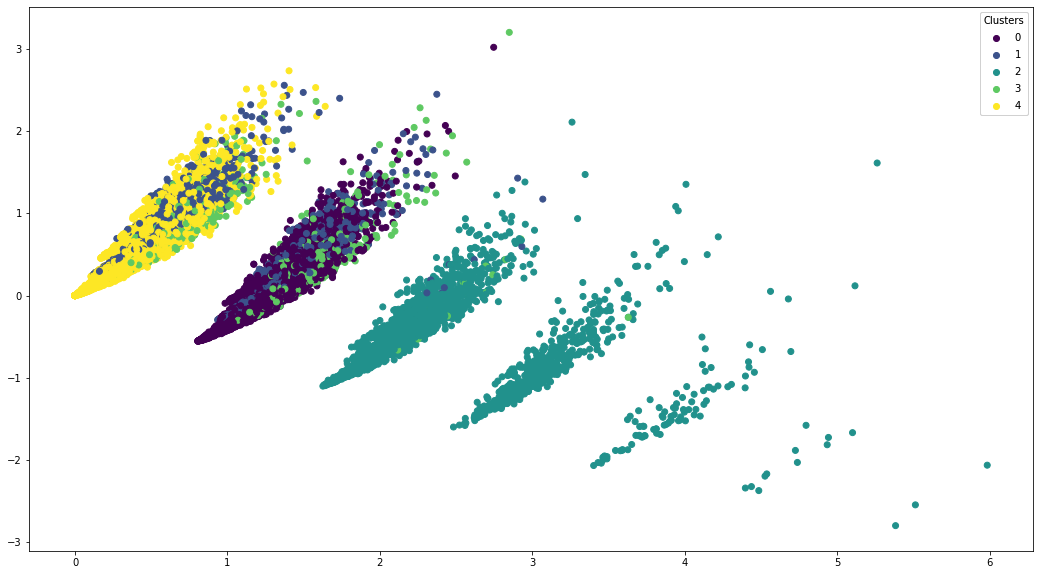

In [67]:
#Visualize the clusters
x = transformed_unigrams[:,0]
y = transformed_unigrams[:,1]
#colors = cm.rainbow(np.linspace(0, 1, y.shape[0]))
fig, ax = plt.subplots(figsize=(18,10))
scatter = ax.scatter(x, y, c=kmeans_labels)
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)
plt.show()

In [68]:
#Evaluate density of the clusters, Mean Silhouette Score
silhouette_score(selected_unigrams, kmeans_labels)

#Negative value indicates wrong clustering
#Near zero indicates overlapping clusters
#The best is near 1
#The calculation involves the distance between each sample in the same cluster
#And it also involves the distance between a sample and other samples in the next nearest cluster 

0.007317944612473131